# Observables for an optical quantum state (`cat`)

We define the `cat` state as the superposition of two coherent states

$$|\psi_{\text{cat}} \rangle = \frac{1}{\mathcal N} ( |\alpha \rangle + |-\alpha \rangle \big ) $$

with $\alpha=2$ and normalization $\mathcal N$.


In [8]:
import numpy as np

from qutip import coherent, about
from qutip.wigner import wigner, qfunc

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
hilbert_size = 32
alpha = 2

psi = coherent(hilbert_size, alpha) + coherent(hilbert_size, -alpha)
psi = psi.unit() # The .unit() function normalizes the state to have unit trace

grid = 32
xvec = np.linspace(-5, 5, 100)
yvec = np.linspace(-3, 3, 100)


w = wigner(psi, xvec, yvec)
q = qfunc(psi, xvec, yvec)

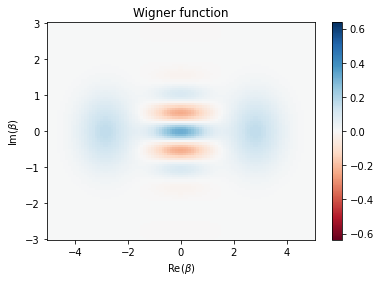

In [4]:
cmap = "RdBu"
im = plt.pcolor(xvec, yvec, w, vmin=-2/np.pi, vmax=2/np.pi, cmap=cmap, shading='auto')
plt.colorbar(im)
plt.xlabel(r"Re($\beta$)")
plt.ylabel(r"Im($\beta$)")
plt.title("Wigner function")
plt.show()

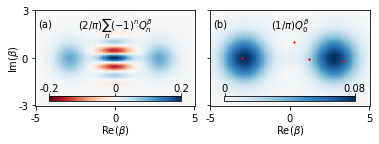

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)

cmap = matplotlib.cm.RdBu

norm = matplotlib.colors.TwoSlopeNorm(vmin=-np.max(np.abs(w)), vcenter=0, vmax=np.max(np.abs(w)))
im = ax[0].pcolor(xvec, yvec, w, norm=norm, cmap=cmap, shading='auto')

plt.subplots_adjust(wspace=0.15)

ax[0].set_xticks([-5, 0, 5])
ax[0].set_yticks([-3, 0, 3])
ax[0].set_xticklabels([-5, 0, 5])
ax[0].set_yticklabels([-3, 0, 3])

axins1 = inset_axes(ax[0],
                    width="82%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower center')
norm = matplotlib.colors.TwoSlopeNorm(vmin=-.2, vcenter=0, vmax=.2)
cb1 = matplotlib.colorbar.ColorbarBase(axins1, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=[-.2, 0, .2])
cb1.set_ticklabels([-.2, 0, .2])
cb1.ax.xaxis.set_tick_params(pad=-.1)

ax[0].set_xlabel(r"Re($\beta$)", labelpad=-0.1)
ax[0].set_ylabel(r"Im($\beta$)", labelpad=-3)
ax[1].set_xlabel(r"Re($\beta$)", labelpad=-0.1)


norm = matplotlib.colors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=np.max(q))
im2 = ax[1].pcolor(xvec, yvec, q,
                   norm=norm,
                   shading='auto',
                   cmap=cmap)

axins2 = inset_axes(ax[1],
                    width="82%",  # width = 50% of parent_bbox width
                    height="5%",  # height : 5%
                    loc='lower center')

vmax = np.round(np.max(q), 2)
norm = matplotlib.colors.TwoSlopeNorm(vmin=-1e-4, vcenter=0, vmax=vmax)

cb2 = matplotlib.colorbar.ColorbarBase(axins2, cmap=cmap,
                                norm=norm,
                                orientation='horizontal',
                                ticks=[0, np.max(q)])
cb2.set_ticklabels([0, vmax])
cb2.ax.xaxis.set_tick_params(pad=-.1)

axins1.xaxis.set_ticks_position("top")
axins2.xaxis.set_ticks_position("top")
    
for a in ax[:2]:
    a.set_aspect('equal')

ax[0].text(0.02, .83, "(a)", transform=ax[0].transAxes)
ax[1].text(0.02, .83, "(b)", transform=ax[1].transAxes)
ax[0].text(.5, .8, r'$(2$/$\pi)\sum_n (-1)^n Q^{{\beta}}_{n}$', transform=ax[0].transAxes, ha="center")
ax[1].text(.5, .8, r"$(1$/$\pi) Q^{{\beta}}_{}$".format(str(0)), transform=ax[1].transAxes, ha="center")
plt.subplots_adjust(wspace=0.09)

ax[1].scatter([-3, 3.4, .25, 1.2], [0, -0.2, 1, -0.1], marker="*", s=2, c="r")

# Version information for QuTiP and TensorFlow

In [9]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.6.2
Numpy Version:      1.19.5
Scipy Version:      1.7.0
Cython Version:     None
Matplotlib Version: 3.4.2
Python Version:     3.9.5
Number of CPUs:     6
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /Users/shahnawaz/miniconda3/envs/qstcgan/lib/python3.9/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generate

In [10]:
!pip show tensorflow

Name: tensorflow
Version: 2.5.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /Users/shahnawaz/miniconda3/envs/qstcgan/lib/python3.9/site-packages
Requires: flatbuffers, wheel, six, tensorflow-estimator, wrapt, opt-einsum, h5py, gast, absl-py, keras-preprocessing, google-pasta, numpy, typing-extensions, astunparse, keras-nightly, tensorboard, termcolor, grpcio, protobuf
Required-by: 
